In [78]:
# General
# ! pip install biosppy
# ! pip install neurokit2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import neurokit2 as nk
from pprint import pprint

# ML
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.Feature_Engineering as Feature_Engineering


# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(Feature_Engineering)

<module 'Components.Feature_Engineering' from '../Components/Feature_Engineering.py'>

# Data

In [3]:
X, y = data_fetching.get_train_data()
#x_test = data_fetching.get_test_data()

# Feature extraction

In [ ]:
f = Feature_Engineering.extract_features_parrallel(X)
print(f)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  406


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  836
Index failed:  1017 with error: 
 `x` must be strictly increasing sequence.
Index failed:  62 with error: 
 `x` must be strictly increasing sequence.


/opt/conda/lib/python3.7/site-packages/neurokit2/signal/signal_period.py:62: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  category=NeuroKitWarning


Index failed:  76 with error: 
 cannot convert float NaN to integer


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/neurokit2/signal/signal_period.py:62: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  category=NeuroKitWarning


Index failed:  957 with error: 
 cannot convert float NaN to integer
Index failed:  1694 with error: 
 `x` must be strictly increasing sequence.


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  1318
Index failed:  1640 with error: 
 `x` must be strictly increasing sequence.


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  2196


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  2133


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  2062


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  2228
Index failed:  2575 with error: 
 `x` must be strictly increasing sequence.


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  3615
Index failed:  3627 with error: 
 `x` must be strictly increasing sequence.


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  3720


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  2633


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Errroooor (none in features):  3840


# Training

In [74]:
print(f.isna().sum())

0      0
1      6
2      6
3     11
4     11
      ..
66     7
67     7
68     7
69     7
70     7
Length: 71, dtype: int64


In [ ]:
scaler = StandardScaler()
X_features = scaler.fit_transform(f,y)
# pprint(f2)

est = SVC(kernel='rbf')
cv_score = cross_val_score(est, X_featurs, y, cv=10, scoring='balanced_accuracy') #'f1_micro')
print(cv_score)
print(np.mean(cv_score))

# Testing

In [159]:
import copy as cp

test = [[141, 405, 658, 1476, 1746, 2009, 2267, 2522, 2780, 3026],
 [170, 431, 678, 954, 1498, 1761, 2031, 2291, 2554, 2803, 3046],
 [183, 446, 706, 969, 1237, 1517, 1783, 2050, 2306, 2566, 2817, 3068],
 [209, 465, 746, 998, 1257, 1536, 1809, 2069, 2326, 2583, 2839, 3087],
 [288, 502, 803, 1084, 1289, 1572, 1852, 2109, 2685, 2872, 3124]]

print("Test 1:")
t1 = cp.deepcopy(test)
t1[0][0] = None
pprint(t1)
t1[0].pop(0)
pprint(peaks_cleaning(t1))

print("\nTest 2:")
t2 = cp.deepcopy(test)
t2[2][5] = None
pprint(t2)
t2[2].pop(5)
pk2 = peaks_cleaning(t2)
pprint(pk2)

# p_t2 = peaks_cleaning(t2)
# print(np.array(p_t2[-1])-np.array(p_t2[0]))

Test 1:
[[None, 405, 658, 1476, 1746, 2009, 2267, 2522, 2780, 3026],
 [170, 431, 678, 954, 1498, 1761, 2031, 2291, 2554, 2803, 3046],
 [183, 446, 706, 969, 1237, 1517, 1783, 2050, 2306, 2566, 2817, 3068],
 [209, 465, 746, 998, 1257, 1536, 1809, 2069, 2326, 2583, 2839, 3087],
 [288, 502, 803, 1084, 1289, 1572, 1852, 2109, 2685, 2872, 3124]]
[[405, 658, 1476, 1746, 2009, 2522, 2780, 3026],
 [431, 678, 1498, 1761, 2031, 2554, 2803, 3046],
 [446, 706, 1517, 1783, 2050, 2566, 2817, 3068],
 [465, 746, 1536, 1809, 2069, 2583, 2839, 3087],
 [502, 803, 1572, 1852, 2109, 2685, 2872, 3124]]

Test 2:
[[141, 405, 658, 1476, 1746, 2009, 2267, 2522, 2780, 3026],
 [170, 431, 678, 954, 1498, 1761, 2031, 2291, 2554, 2803, 3046],
 [183, 446, 706, 969, 1237, None, 1783, 2050, 2306, 2566, 2817, 3068],
 [209, 465, 746, 998, 1257, 1536, 1809, 2069, 2326, 2583, 2839, 3087],
 [288, 502, 803, 1084, 1289, 1572, 1852, 2109, 2685, 2872, 3124]]
[[141, 405, 658, 1746, 2009, 2522, 2780, 3026],
 [170, 431, 678, 1761, 

In [210]:
nk.ecg_process(X.iloc[62].dropna(), sampling_rate=300)

ValueError: `x` must be strictly increasing sequence.

/opt/conda/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  gs.tight_layout(fig)


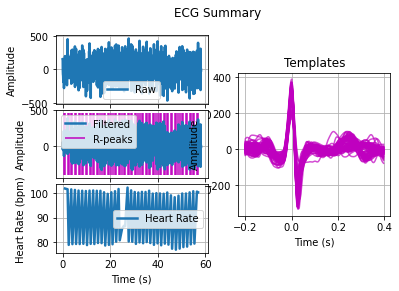

ReturnTuple(ts=array([0.00000000e+00, 3.33314230e-03, 6.66628460e-03, ...,
       5.81500006e+01, 5.81533337e+01, 5.81566669e+01]), filtered=array([ 6.48712154e+00,  1.07411279e+01,  1.47387895e+01, ...,
       -1.86092837e+01, -1.03572822e+01, -4.79262775e-16]), rpeaks=array([  160,   304,   626,   771,  1089,  1234,  1551,  1697,  2009,
        2156,  2469,  2615,  2930,  3077,  3394,  3539,  3855,  4002,
        4311,  4458,  4767,  4914,  5224,  5373,  5689,  5837,  6147,
        6295,  6607,  6753,  7055,  7202,  7501,  7744,  7887,  8189,
        8337,  8639,  8786,  9094,  9243,  9550,  9698, 10001, 10150,
       10458, 10605, 10909, 11057, 11367, 11517, 11824, 11972, 12281,
       12431, 12742, 12890, 13197, 13346, 13659, 13810, 14136, 14285,
       14614, 14762, 15085, 15232, 15555, 15703, 16018, 16165, 16477,
       16624, 16934, 17082]), templates_ts=array([-2.00000000e-01, -1.96666667e-01, -1.93333333e-01, -1.90000000e-01,
       -1.86666667e-01, -1.83333333e-01, -1.8000000

In [207]:
import biosppy.signals.ecg as ecg
ecg.ecg(signal=X.iloc[62].dropna(), sampling_rate=300.0)